# Examen

Load modules

<div style="float: right;" markdown="1">
    <img src="../material/figures/leastaction.png">
</div>
Para el problema de un resorte con una masa en el extremo de 0.2 Kg y una constante elástica $k=0.8$ N/m, defina una función en Python que mininimize la acción:


$$S=\int_{t_1}^{t_2} L\, {\rm d}t $$
entre $t_1=\pi/8$ y $t_2=3\pi/8$

y donde 

$$L(t)=T(t)-V(t)$$

con
$$T=\frac12 m v^2\,\qquad V=\frac12 k x^2\,$$

Para la trayectoria que minimize la acción encuentre y grafique  todas la cantidades físicas como velocidad, aceleración y energía.


In [1]:
import numpy as np
from scipy import optimize
from scipy.misc import derivative
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Se define la funcion que calcula la accion

In [6]:
def S(x,ti=np.pi/8,tf=3*np.pi/8,m=0.2,k=0.8,xini=0.70710678118654757,xend=0.70710678118654757):
    
    ti=float(ti)
    tf=float(tf)
    x=np.asarray(x)
    Dt=(tf-ti)/x[:-1].size
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*((x[1:]-x[:-1])/Dt)**2 - 0.5*k*((x[1:]+x[:-1])/2)**2)*Dt).sum()

Se define la funcion que minimiza dicha accion

In [7]:
def xfit(n,ti=np.pi/8,tf=3*np.pi/8,m=0.2,k=0.8,xini=0.70710678118654757,xend=0.70710678118654757,ftol=1E-8):
    
    ti=float(ti)
    tf=float(tf)

    if n%2==0:
        print ('x array must be odd')
        sys.exit()
  
    x0=np.zeros(n)
    a=optimize.fmin_powell(S,x0,args=(ti,tf,m,k,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=(tf-ti)/x[:-1].size
    return x,xmax,Smin,Dt  

Se definen las variables y se calcula la minima accion

In [13]:
ti=np.pi/8
tf=3*np.pi/8
m=0.2
k=0.8
n=23
y=xfit(n,ti,tf,m,k,ftol=1E-16)

Optimization terminated successfully.
         Current function value: -0.199867
         Iterations: 37
         Function evaluations: 9937


Se comprueba que minimiza la accion

In [28]:
S([0.70710678118654757,1,0.70710678118654757],ti,tf)

-0.18519112404816368

Se definen la posicion, la velocidad y la aceleracion

In [38]:
t=np.linspace(tini,tfin,n) 
x=y[0]
v=(x[1:]-x[:-1])/y[3]
a=(v[1:]-v[:-1])/y[3]

 Se grafican la posicion y velocidad en el intervalo de tiempo [$\pi/8 ,3\pi/8 $]

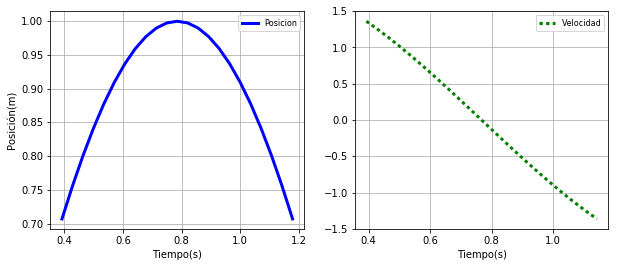

In [43]:
plt.figure( figsize = (10,4) )

plt.subplot(1,2,1)
plt.plot(t,x, color="blue", linewidth=3, label="Posicion")
plt.ylabel("Posición(m)")
plt.xlabel("Tiempo(s)")
plt.legend( loc="upper right", fontsize=8 )
plt.grid()

plt.subplot(1,2,2)
plt.plot(t[:-1], v,'g:', linewidth=3, label="Velocidad")
plt.xlabel("Tiempo(s)")
plt.legend( loc="upper right", fontsize=8 )

plt.grid()

Se grafican la energia cinetica y potencial

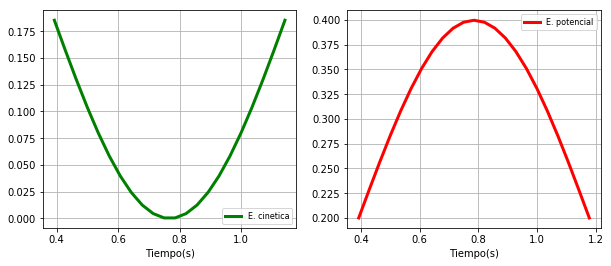

In [30]:
plt.figure( figsize = (10,4) )

plt.subplot(1,2,1)
plt.plot(t[:-1], 0.5*0.2*v**2,'g', linewidth=3, label="E. cinetica")
plt.xlabel("Tiempo(s)")
plt.legend( loc="lower right", fontsize=8 )
plt.grid()

plt.subplot(1,2,2)
plt.plot(t, 0.5*0.8*x**2,'r', linewidth=3, label="E. potencial")
plt.xlabel("Tiempo(s)")
plt.legend( loc="upper right", fontsize=8 )
plt.grid()